In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


# MNIST

In [3]:
len(mnist)
#training, test, validation

3

In [4]:
print("training의 이미지 수 : ",mnist.train.images.shape)
print("training의 라벨 수 : ",mnist.train.labels.shape)
print("test의 이미지 수 : ",mnist.test.images.shape)
print("test의 라벨 수 : ",mnist.test.labels.shape)
print("validation의 이미지 수 : ",mnist.validation.images.shape)
print("validation의 라벨 수 : ",mnist.validation.labels.shape)

training의 이미지 수 :  (55000, 784)
training의 라벨 수 :  (55000, 10)
test의 이미지 수 :  (10000, 784)
test의 라벨 수 :  (10000, 10)
validation의 이미지 수 :  (5000, 784)
validation의 라벨 수 :  (5000, 10)


# GAN

hyperparameter설정

In [5]:
total_epoch = 100
batch_size = 100
learning_rate = 0.0002

n_hidden = 256
n_input = 28 * 28
n_noise = 128

placeholder설정(placeholder : input과 output을 받을 변수)

In [6]:
X = tf.placeholder(tf.float32, [None, n_input])
Z = tf.placeholder(tf.float32, [None, n_noise])

Variable설정(신경망 내에서 학습될 변수)

In [7]:
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))

Generator의 신경망 만들기

In [8]:
G=tf.matmul(Z,G_W1)+G_b1
G=tf.nn.relu(G)
G=tf.matmul(G,G_W2)+G_b2
G=tf.nn.sigmoid(G)

Discriminator의 신경망 만들기

In [9]:
D_generate=tf.matmul(G,D_W1)+D_b1
D_generate=tf.nn.relu(D_generate)
D_generate=tf.matmul(D_generate,D_W2)+D_b2
D_generate=tf.nn.sigmoid(D_generate)

D_real=tf.matmul(X,D_W1)+D_b1
D_real=tf.nn.relu(D_real)
D_real=tf.matmul(D_real,D_W2)+D_b2
D_real=tf.nn.sigmoid(D_real)

loss값 설정 및 training식 만들기

In [10]:
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_generate))
loss_G = tf.reduce_mean(tf.log(D_generate))

D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D,var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G,var_list=G_var_list)

훈련결과를 초기화시켜주는 식

In [11]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

training

Epoch :  0 D_loss :  -0.44294655 G_loss :  -2.2565544


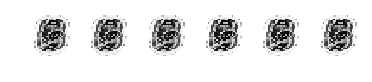

In [ ]:
total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        noise=np.random.normal(size=[batch_size,n_noise])
        
        _,loss_val_D=sess.run([train_D,loss_D],feed_dict={X:batch_xs, Z:noise})
        _,loss_val_G=sess.run([train_G,loss_G],feed_dict={Z:noise})
        
    if epoch%10==0:
        print('Epoch : ',epoch,'D_loss : ',loss_val_D, 'G_loss : ',loss_val_G)
        
        sample_size=6
        sample_noise=np.random.normal(size=[sample_size,n_noise])
        samples=sess.run(G,feed_dict={Z:sample_noise})
        
        fig,ax=plt.subplots(1,sample_size,figsize=(sample_size,1))
        
        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i],(28,28)),cmap=plt.cm.gray_r)
        plt.show()
    
print('The end')